In [1]:
#setwd("/Users/phucvu/R")
setwd("/home/phucvu/R")

In [2]:
df <- read.table("adult.data", 
                 sep = ',', 
                 fill = FALSE, 
                 strip.white = TRUE)

colnames(df) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
                 "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                 "hours_per_week", "native_country", "salary")

**Type de données de dataset**

In [3]:
sapply(df, class)

age      workclass         fnlwgt      education  education_num 
     "integer"       "factor"      "integer"       "factor"      "integer" 
marital_status     occupation   relationship           race            sex 
      "factor"       "factor"       "factor"       "factor"       "factor" 
  capital_gain   capital_loss hours_per_week native_country         salary 
     "integer"      "integer"      "integer"       "factor"       "factor"

In [4]:
head(df)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
cat("Element manqué dans le dataset: ", sum(is.na(df)), "\n")

Element manqué dans le dataset:  0 


In [6]:
library(ggplot2)
library(plyr)
#library(dplyr)
#library(data.table)
library(caret)
library(reshape2)

#Decision tree package
library(rpart)
library(rpart.plot)
library(e1071)

#Encoder
library(CatEncoders)

#Classification
library(class)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: lattice

Attaching package: ‘CatEncoders’

The following object is masked from ‘package:base’:

    transform



**Dimension de dataset**

In [7]:
cat("Nombre de colonne, Nombre de lignes: ", dim(df))

Nombre de colonne, Nombre de lignes:  32561 15

In [8]:
str(df)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  40 1

Le dataset contient 9 varaibles catérogique et 6 variables numériques

income est la variable ciblée

# Caractéristiques statistique de dataset

In [9]:
summary(df)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                 marital_status 
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

**Nombre de valeur null dans toutes les colonnes**

In [10]:
colSums(is.na(df)) ##TODO

age      workclass         fnlwgt      education  education_num 
             0              0              0              0              0 
marital_status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital_gain   capital_loss hours_per_week native_country         salary 
             0              0              0              0              0

# Explorer les variables catégoriques

**Extraire des variables catéroriques**

In [11]:
categorical <- vector()
for (i in colnames(df)){
    if (is.factor(df[[i]])) {
        categorical <- c(categorical, i)
    }  
}

In [12]:
categorical

[1] "workclass"      "education"      "marital_status" "occupation"    
[5] "relationship"   "race"           "sex"            "native_country"
[9] "salary"

**Explorer la varaible salary**

In [13]:
sum(is.na(df$salary))

[1] 0

Il n'y a aucun de valeur null dans la variable ciblée income

In [14]:
unique(df$salary)

[1] <=50K >50K 
Levels: <=50K >50K

Les deux valeurs uniques présentées dans la variable salary est <= 50K et >50K

In [15]:
count(df$salary)

x,freq
<=50K,24720
>50K,7841


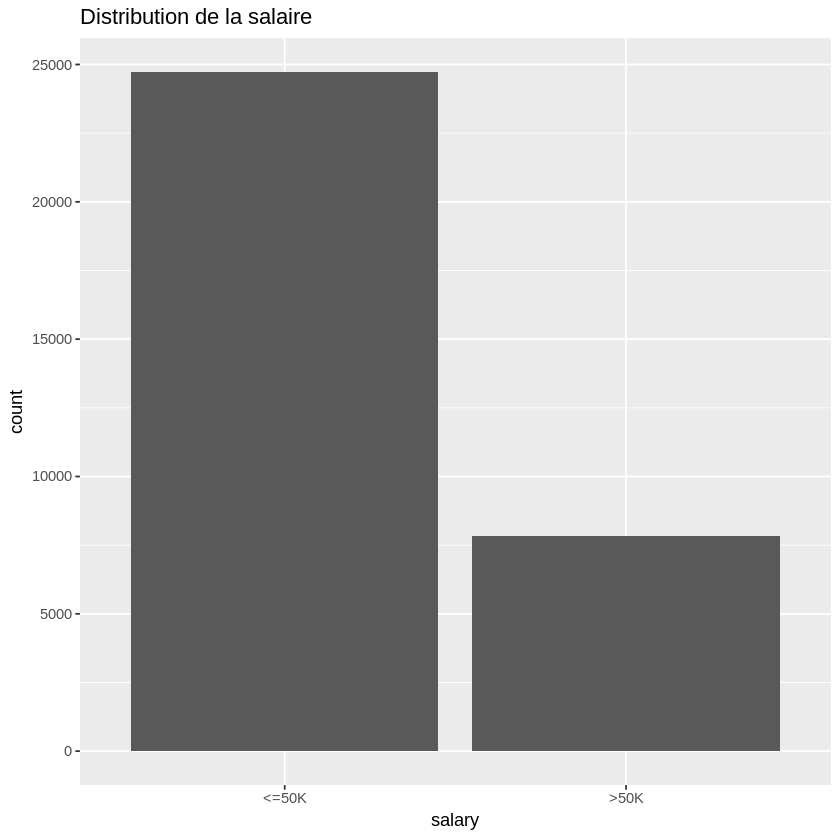

In [16]:
ggplot(df, aes(x=salary)) + geom_bar(stat="count") + ggtitle("Distribution de la salaire")

**Visualisation de salary par rapport à la variable sex**

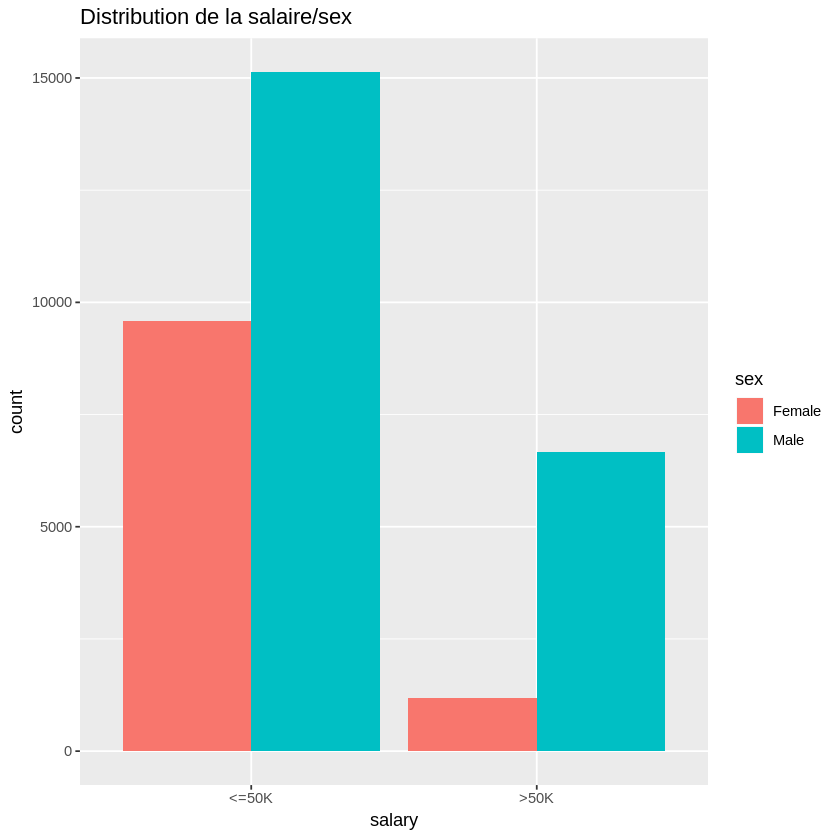

In [17]:
ggplot(df, aes(x=salary, fill=sex)) + 
        geom_bar(stat="count", position=position_dodge()) + 
        ggtitle("Distribution de la salaire/sex")

On peut constater que les hommes gagnent plus que les femmes dans toutes les catégories

**Visualisation de salary par rapport à la variable race**

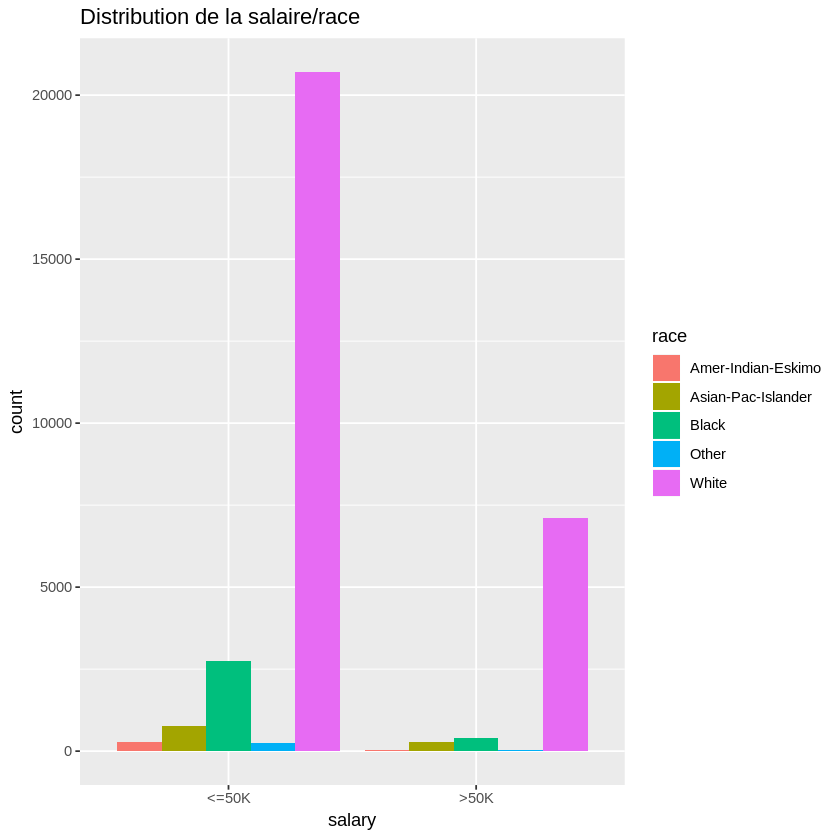

In [18]:
ggplot(df, aes(x=salary, fill=race)) + 
        geom_bar(stat="count", position=position_dodge()) + 
        ggtitle("Distribution de la salaire/race")

Les blancs gagent significativement plus que les autres races

**Explorer la variable workclass**

In [19]:
unique(df$workclass)

[1] State-gov        Self-emp-not-inc Private          Federal-gov     
[5] Local-gov        ?                Self-emp-inc     Without-pay     
[9] Never-worked    
9 Levels: ? Federal-gov Local-gov Never-worked Private ... Without-pay

In [20]:
count(df$workclass)

x,freq
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14


On peut constater qu'il y a 1836 valeurs marqués ? dans la variable workclass. On remplace donc ces valeurs ? par la valeur NaN

In [21]:
df$workclass[ df$workclass == "?" ] <- NA
df$workclass = factor(df$workclass)

In [22]:
count(df$workclass)

x,freq
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14
NA,1836


**Visualiser la variable workclass**

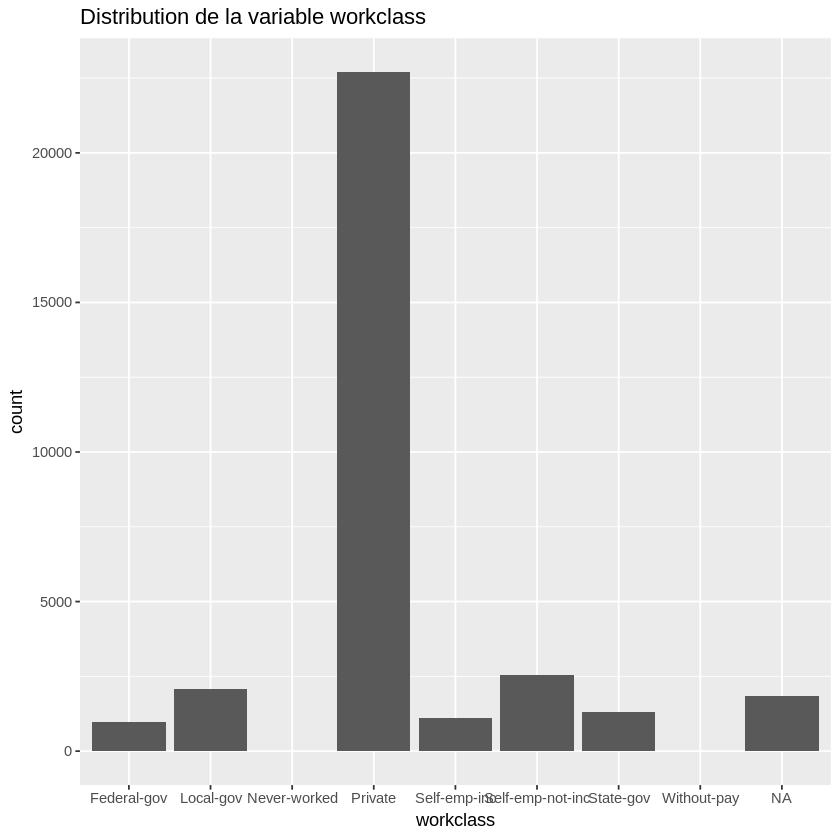

In [23]:
ggplot(df, aes(x=workclass)) + 
        geom_bar(stat="count") + 
        ggtitle("Distribution de la variable workclass")

Il y a énormément de travailleurs privés qu'aux autres catégories employeurs

**Visualisation de salary par rapport à la variable workclass**

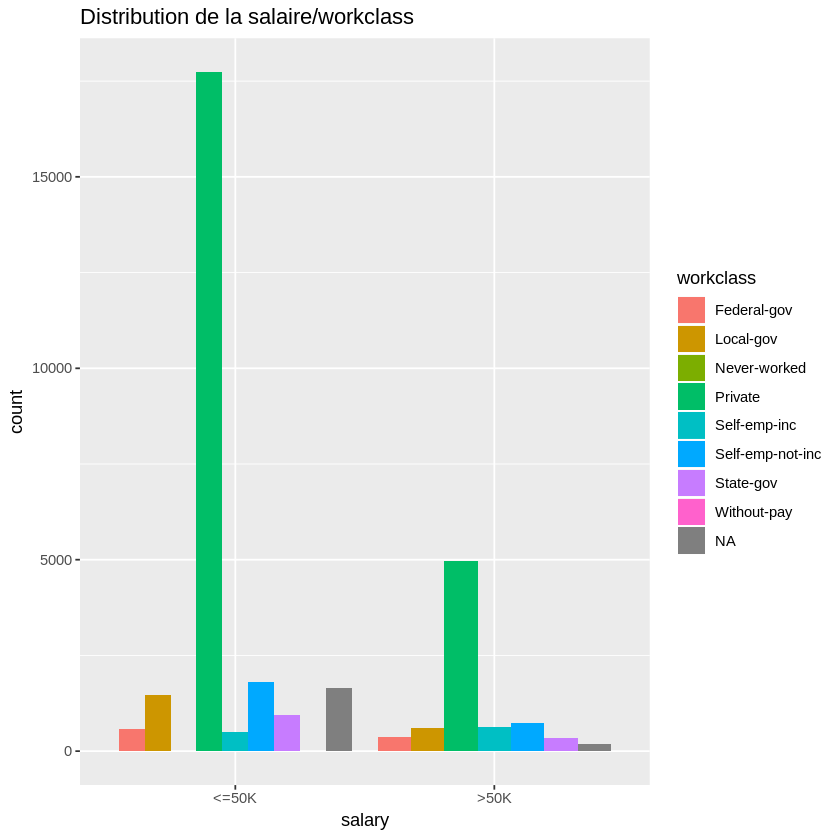

In [24]:
ggplot(df, aes(x=salary, fill=workclass)) + 
        geom_bar(stat="count", position=position_dodge()) + 
        ggtitle("Distribution de la salaire/workclass")

Les employeurs gagent au-dessous de 50K dans la plupart de catégories sauf la class privé

**Explorer la variable occupation**

In [25]:
unique(df$occupation)

[1] Adm-clerical      Exec-managerial   Handlers-cleaners Prof-specialty   
 [5] Other-service     Sales             Craft-repair      Transport-moving 
 [9] Farming-fishing   Machine-op-inspct Tech-support      ?                
[13] Protective-serv   Armed-Forces      Priv-house-serv  
15 Levels: ? Adm-clerical Armed-Forces Craft-repair ... Transport-moving

In [26]:
df$occupation[ df$occupation == "?" ] <- NA
df$occupation = factor(df$occupation)

In [27]:
count(df$occupation)

x,freq
Adm-clerical,3770
Armed-Forces,9
Craft-repair,4099
Exec-managerial,4066
Farming-fishing,994
Handlers-cleaners,1370
Machine-op-inspct,2002
Other-service,3295
Priv-house-serv,149
Prof-specialty,4140


**Visualiser la variable occupation**

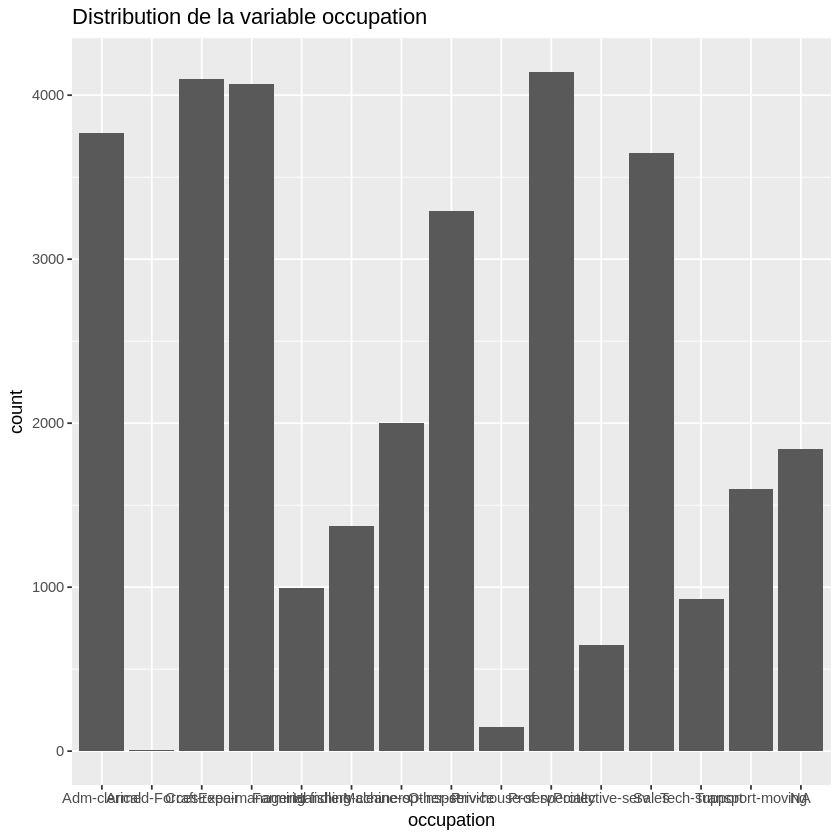

In [28]:
ggplot(df, aes(x=occupation)) + 
        geom_bar(stat="count") + 
        ggtitle("Distribution de la variable occupation")

**Explorer la variable native country**

In [29]:
unique(df$native_country)

[1] United-States              Cuba                      
 [3] Jamaica                    India                     
 [5] ?                          Mexico                    
 [7] South                      Puerto-Rico               
 [9] Honduras                   England                   
[11] Canada                     Germany                   
[13] Iran                       Philippines               
[15] Italy                      Poland                    
[17] Columbia                   Cambodia                  
[19] Thailand                   Ecuador                   
[21] Laos                       Taiwan                    
[23] Haiti                      Portugal                  
[25] Dominican-Republic         El-Salvador               
[27] France                     Guatemala                 
[29] China                      Japan                     
[31] Yugoslavia                 Peru                      
[33] Outlying-US(Guam-USVI-etc) Scotland                  
[35] Trinadad&Tobago            Greece                    
[37] Nicaragua                  Vietnam                   
[39] Hong                       Ireland                   
[41] Hungary                    Holand-Netherlands        
42 Levels: ? Cambodia Canada China Columbia Cuba Dominican-Republic ... Yugoslavia

In [30]:
df$native_country[df$native_country == "?"] <- NA
df$native_country = factor(df$native_country)

In [31]:
summary(df$native_country)

Cambodia                     Canada 
                        19                        121 
                     China                   Columbia 
                        75                         59 
                      Cuba         Dominican-Republic 
                        95                         70 
                   Ecuador                El-Salvador 
                        28                        106 
                   England                     France 
                        90                         29 
                   Germany                     Greece 
                       137                         29 
                 Guatemala                      Haiti 
                        64                         44 
        Holand-Netherlands                   Honduras 
                         1                         13 
                      Hong                    Hungary 
                        20                         13 
                     India                       Iran 
                       100                         43 
                   Ireland                      Italy 
                        24                         73 
                   Jamaica                      Japan 
                        81                         62 
                      Laos                     Mexico 
                        18                        643 
                 Nicaragua Outlying-US(Guam-USVI-etc) 
                        34                         14 
                      Peru                Philippines 
                        31                        198 
                    Poland                   Portugal 
                        60                         37 
               Puerto-Rico                   Scotland 
                       114                         12 
                     South                     Taiwan 
                        80                         51 
                  Thailand            Trinadad&Tobago 
                        18                         19 
             United-States                    Vietnam 
                     29170                         67 
                Yugoslavia                       NA's 
                        16                        583

**Visualiser la variable native_country**

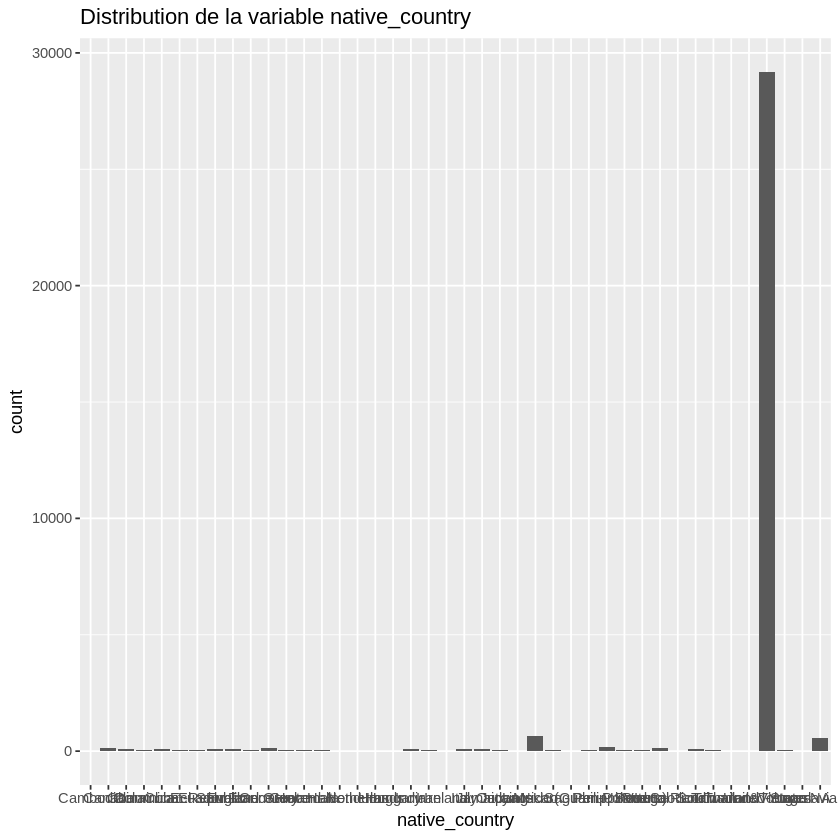

In [32]:
ggplot(df, aes(x=native_country)) + 
        geom_bar(stat="count") + 
        ggtitle("Distribution de la variable native_country")

Les Etat-Unis sont occupés une grande partie parmi les valeurs pour la variable native_country. Ceci peut amener à un résultat biasé lors de la création de modèle

# Explorer les variables numériques

**Extraire des variables numériques**

In [33]:
numerical <- vector()
for (i in colnames(df)){
    if (is.numeric(df[[i]])) {
        numerical <- c(numerical, i)
    }  
}

In [34]:
numerical

[1] "age"            "fnlwgt"         "education_num"  "capital_gain"  
[5] "capital_loss"   "hours_per_week"

In [35]:
head(df[,numerical])

age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
39,77516,13,2174,0,40
50,83311,13,0,0,13
38,215646,9,0,0,40
53,234721,7,0,0,40
28,338409,13,0,0,40
37,284582,14,0,0,40


In [36]:
colSums(is.na(df[,numerical])) ##TODO

age         fnlwgt  education_num   capital_gain   capital_loss 
             0              0              0              0              0 
hours_per_week 
             0

**Explorer la variable age**

In [37]:
length(unique(df$age))

[1] 73

**Visualiser la varibale age**

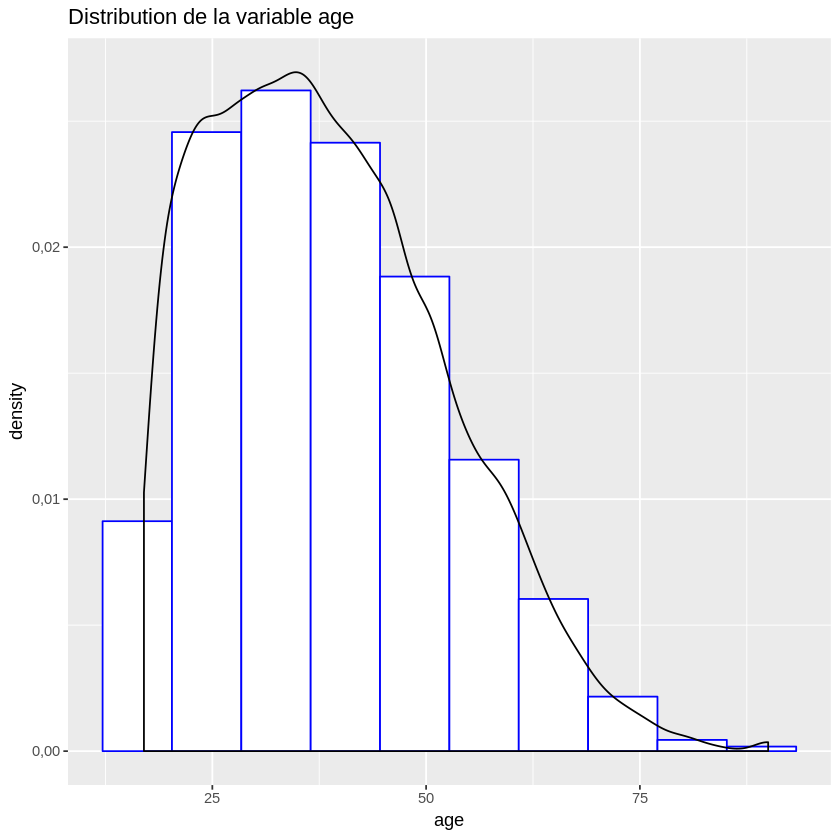

In [38]:
ggplot(df, aes(x=age)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   bins=10, fill="white", color="blue") +
    geom_density(alpha=.2) + # Overlay with transparent density plot
    ggtitle("Distribution de la variable age")

**Détecter les outliers dans la variable age**

In [39]:
##TODO

**Visualisation de salary par rapport à la variable age**

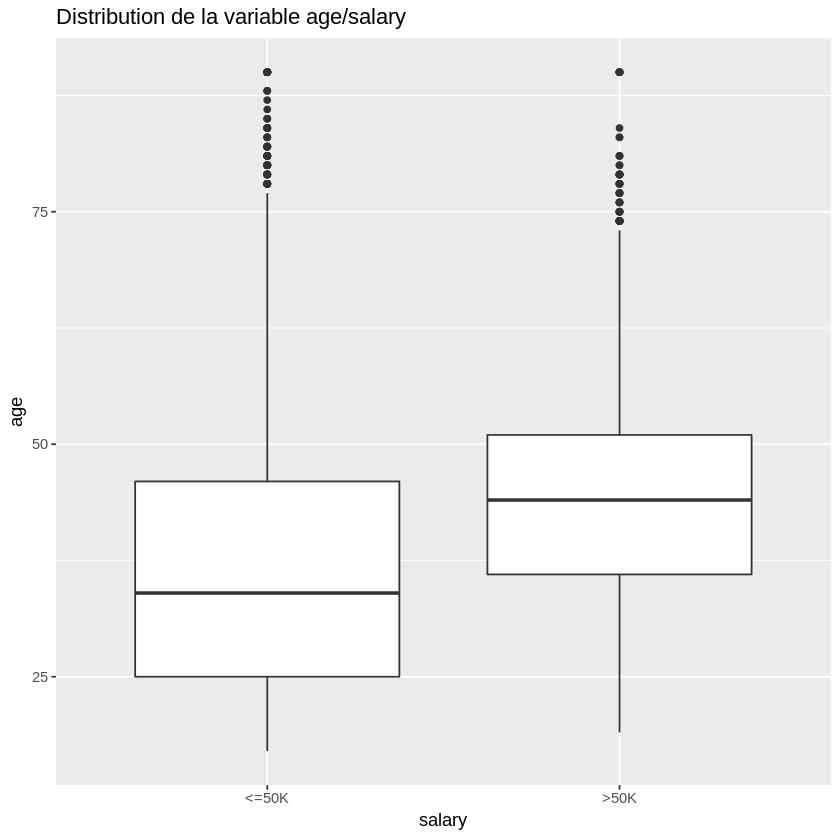

In [40]:
ggplot(df, aes(x=salary, y=age)) + 
  geom_boxplot() + 
    ggtitle("Distribution de la variable age/salary")

Les jeunes gagnent moins que les personnes agées

**Visualisation de salary par rapport à la variable sex**

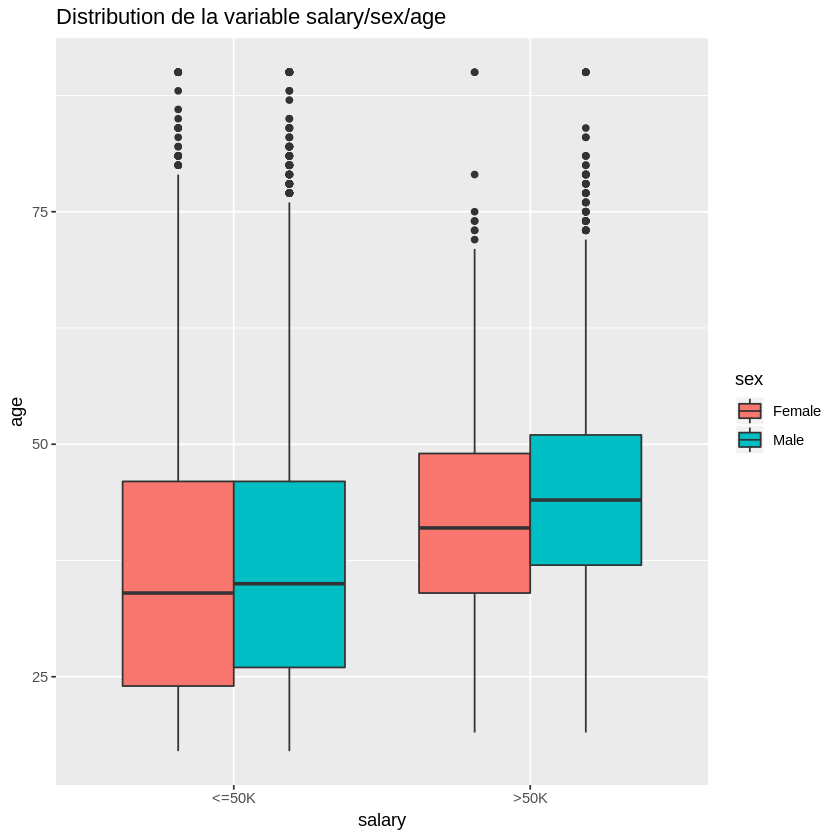

In [41]:
ggplot(df, aes(x=salary, y=age, fill=sex)) + 
  geom_boxplot( position=position_dodge()) + 
    ggtitle("Distribution de la variable salary/sex/age")

# Feature Engineering

**Remplissage de données manquées**

In [42]:
df$native_country[is.na(df$native_country)] <- names(which.max(table(df$native_country)))
df$workclass[is.na(df$workclass)] <- names(which.max(table(df$workclass)))
df$occupation[is.na(df$occupation)] <- names(which.max(table(df$occupation)))

**Label encoding**

In [43]:
newDF <- df

In [44]:
for (i in categorical) {
    enc <- LabelEncoder.fit(df[[i]])
    newDF[[i]] <- transform(enc, df[[i]])
}

In [45]:
head(newDF)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
39,7,77516,10,13,5,1,2,5,2,2174,0,40,39,1
50,6,83311,10,13,3,4,1,5,2,0,0,13,39,1
38,4,215646,12,9,1,6,2,5,2,0,0,40,39,1
53,4,234721,2,7,3,6,1,3,2,0,0,40,39,1
28,4,338409,10,13,3,10,6,3,1,0,0,40,5,1
37,4,284582,13,14,3,4,6,5,1,0,0,40,39,1


**Corrélation**

In [46]:
#Creation de la matrice corrélation
newDF <- round(cor(newDF),2)

#Melt data to bring the correlation values in two axis
melted_data <- melt(newDF)
#head(melted_data)

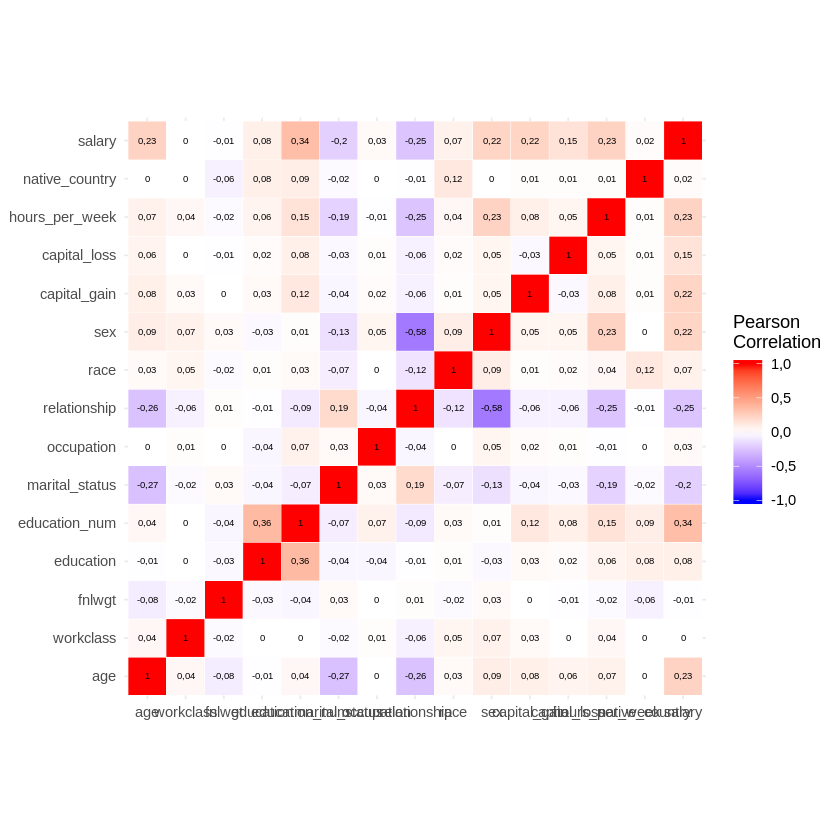

In [47]:
ggheatmap = ggplot(melted_data, aes(Var2, Var1, fill = value)) + geom_tile(color = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), space = "Lab", name = "Pearson\nCorrelation") + theme_minimal() + coord_fixed()
ggheatmap + geom_text(aes(Var2, Var1, label = value), color = "black", size = 2) + theme(axis.title.x = element_blank(), axis.title.y = element_blank())

Comme on peut voir dans la visualisation heatmap les deux variables education et educations_num sont fortement corrélées, on avait le meme phénomène pour le couple de variable relationship et martial_status. Par conséquent, on pourra enlever les variables relationship et education. Il est préférable de garder les variables numériques pour contruire le modèle

In [48]:
df = subset(df, select = -c(relationship, education))

In [49]:
categorical <- categorical[categorical != "relationship"]
categorical <- categorical[categorical != "education"]

#Splitter la cible
categorical <- categorical[categorical != "salary"]

# Declarer les vecteurs feature et la variable ciblée

In [50]:
# Random sample indexes
train_index <- sample(1:nrow(df), 0.7 * nrow(df))
test_index <- setdiff(1:nrow(df), train_index)

# Build X_train, y_train, X_test, y_test
X_train <- df[train_index, -13]
y_train <- df[train_index, "salary"]

X_test <- df[test_index, -13]
y_test <- df[test_index, "salary"]

In [51]:
dim(X_train)

[1] 22792    12

In [52]:
dim(X_test)

[1] 9769   12

In [53]:
#X_train$native_country[is.na(X_train$native_country)] <- names(which.max(table(X_train$native_country)))
#X_train$workclass[is.na(X_train$workclass)] <- names(which.max(table(X_train$workclass)))
#X_train$occupation[is.na(X_train$occupation)] <- names(which.max(table(X_train$occupation)))

#X_test$native_country[is.na(X_test$native_country)] <- names(which.max(table(X_test$native_country)))
#X_test$workclass[is.na(X_test$workclass)] <- names(which.max(table(X_test$workclass)))
#X_test$occupation[is.na(X_test$occupation)] <- names(which.max(table(X_test$occupation)))

In [54]:
count(X_train$workclass)

x,freq
Federal-gov,644
Local-gov,1492
Never-worked,5
Private,17108
Self-emp-inc,809
Self-emp-not-inc,1806
State-gov,918
Without-pay,10


In [55]:
encoder <- dummyVars(" ~ .", data=X_train)
X_train <- data.frame(predict(encoder, newdata = X_train)) 

In [56]:
dim(X_train)

[1] 22792    83

In [58]:
dim(X_test)

[1] 9769   83

# Arbre de décision

**Fonctionne de prédiction**

In [59]:
predictData <- function(model, feature_test, target_test) {
    pred <- predict(model, feature_test, type = "class")
    mc <- table(target_test, pred)
    return(mc)
}

buildMC <- function(table, colNames, rowNames) {
    colLeft <- c(table[1,1], table[2,1])
    colRight <- c(table[1,2], table[2,2])
    mc <- data.frame(colLeft, colRight, row.names=rowNames)
    colnames(mc) <- colNames 
    return (mc)
}

statMC <- function(mc) {
    accuracy <- sum(diag(mc)/(sum(rowSums(mc)))) * 100
    sensitivity <- mc[1,1]/(mc[1,1] + mc[2,1]) #Precision
    specificity <- mc[2,2]/(mc[1,2] + mc[2,2])
    recall <- mc[1,1]/(mc[1,1] + mc[1,2]) #True positive
    false_positive <- mc[2,1]/(mc[2,1] + mc[2,2])
    
    true_negative <- mc[2,2]/(mc[2,1] + mc[2,2])
    arithmetic_mean <- (recall + true_negative)/2
    geometric_mean <- sqrt(recall * true_negative)
    
    cat("Accuracy: ", accuracy, "\n")
    cat("Sensitivity: ", sensitivity, "\n") #Precision nombre de positive bien classifié
    cat("Specificity: ", specificity, "\n") #nombre de négative bien classifié
    cat("Recall: ", recall, "\n")
    cat("True Negative: ", true_negative, "\n")
    cat("False Positive: ", false_positive, "\n")
    cat("Arithmetic Mean: ", arithmetic_mean, "\n")
    cat("Geometric Mean: ", geometric_mean, "\n")
    
    info <- c(false_positive, recall)
    return(info)
}

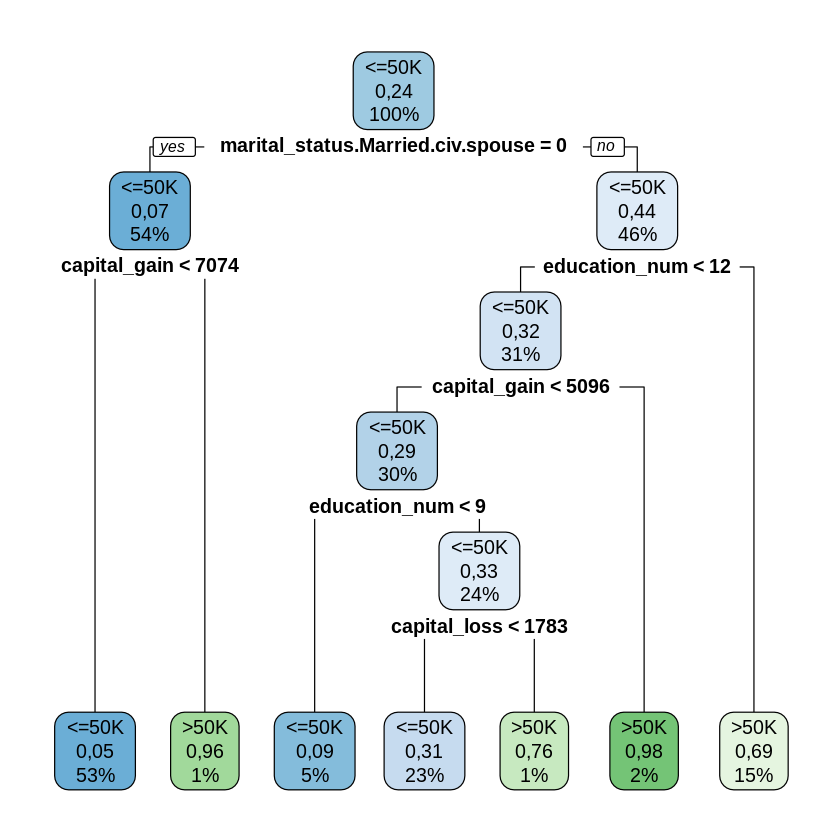

In [60]:
treeModel <- rpart(y_train~., data=X_train, method="class")
#treePredict <- predict(treeModel, X_test, type = "class")
#confusionMatrix(y_test, treePredict)
rpart.plot(treeModel)

In [130]:
validate_test <- predictData(treeModel, X_test, y_test)

mc <- validate_test
infoDT <- statMC(mc)

Accuracy:  85.16737 
Sensitivity:  0.8703611 
Specificity:  0.7653824 
Recall:  0.9448425 
True Negative:  0.5611298 
False Positive:  0.4388702 
Arithmetic Mean:  0.7529862 
Geometric Mean:  0.7281341 


In [86]:
#row_names=c("Correct <=50K", "Correct >=50K")
#col_names=c("Predicted <=50K", "Predicted >50K")
#confusionMatrix = buildMC(validate_test, col_names, row_names)

# Cross validation

In [158]:
encoder <- dummyVars(" ~ .", data=df[, names(df) != "salary"])
dfCV <- data.frame(predict(encoder, newdata = df))
dfCV$salary <- df$salary

In [159]:
head(dfCV)

age,workclass.Federal.gov,workclass.Local.gov,workclass.Never.worked,workclass.Private,workclass.Self.emp.inc,workclass.Self.emp.not.inc,workclass.State.gov,workclass.Without.pay,fnlwgt,...,native_country.Puerto.Rico,native_country.Scotland,native_country.South,native_country.Taiwan,native_country.Thailand,native_country.Trinadad.Tobago,native_country.United.States,native_country.Vietnam,native_country.Yugoslavia,salary
39,0,0,0,0,0,0,1,0,77516,...,0,0,0,0,0,0,1,0,0,<=50K
50,0,0,0,0,0,1,0,0,83311,...,0,0,0,0,0,0,1,0,0,<=50K
38,0,0,0,1,0,0,0,0,215646,...,0,0,0,0,0,0,1,0,0,<=50K
53,0,0,0,1,0,0,0,0,234721,...,0,0,0,0,0,0,1,0,0,<=50K
28,0,0,0,1,0,0,0,0,338409,...,0,0,0,0,0,0,0,0,0,<=50K
37,0,0,0,1,0,0,0,0,284582,...,0,0,0,0,0,0,1,0,0,<=50K


In [160]:
train_control <- trainControl(method="cv", number=10)
# Fit Decision Tree
model <- train(salary~., data=dfCV, trControl=train_control, method="rpart")
# Summarise Results
print(model)

CART 

32561 samples
   83 predictor
    2 classes: '<=50K', '>50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 29305, 29305, 29305, 29305, 29305, 29305, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0,03685754  0,8395631  0,5031654
  0,06453259  0,8277695  0,4554092
  0,12492029  0,7875979  0,2052590

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0,03685754.


In [107]:
n <- nrow(dfCV) #Nb observations
K <- 10 #10-validation croisée
taille <- n%/%K #Taille chaque bloc
set.seed(5) #Obtenir la meme séquence tout le temps
alea <- runif(n) 
rang <- rank(alea)
bloc <- (rang-1)%/%taille + 1#Numeroter de bloc
bloc <- as.factor(bloc)
print(summary(bloc))

   1    2    3    4    5    6    7    8    9   10   11 
3256 3256 3256 3256 3256 3256 3256 3256 3256 3256    1 


In [105]:
class(bloc)

[1] "factor"

In [ ]:
for (k in 1:K) {
    treeModel <- rpart(salary~., data=dfCV[bloc != k], method="class")
    treePredict <- predict(treeModel, dfCV[bloc == k], type = "class")
    matrixConfus <- table(dfCV$salary[bloc==k], treePredict)
    mc
    #rpart.plot(treeModel)
}

# K Nearest Neighbor

In [119]:
pr <- knn(X_train,X_test,cl=y_train,k=10)
 
##create confusion matrix
tab <- table(pr,y_test)

##this function divides the correct predictions by total number of predictions that tell us how accurate teh model is.

infoKNN <- statMC(tab)
#accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
#accuracy(tab)

Accuracy:  79.0562 
Sensitivity:  0.9636339 
Specificity:  0.2508432 
Recall:  0.8004492 
True Negative:  0.6886574 
False Positive:  0.3113426 
Arithmetic Mean:  0.7445533 
Geometric Mean:  0.7424522 


In [132]:
dd1 <- data.frame(FP = infoDT[1], TP = infoDT[2])
dd2 <- data.frame(FP = infoKNN[1], TP = infoKNN[2])

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


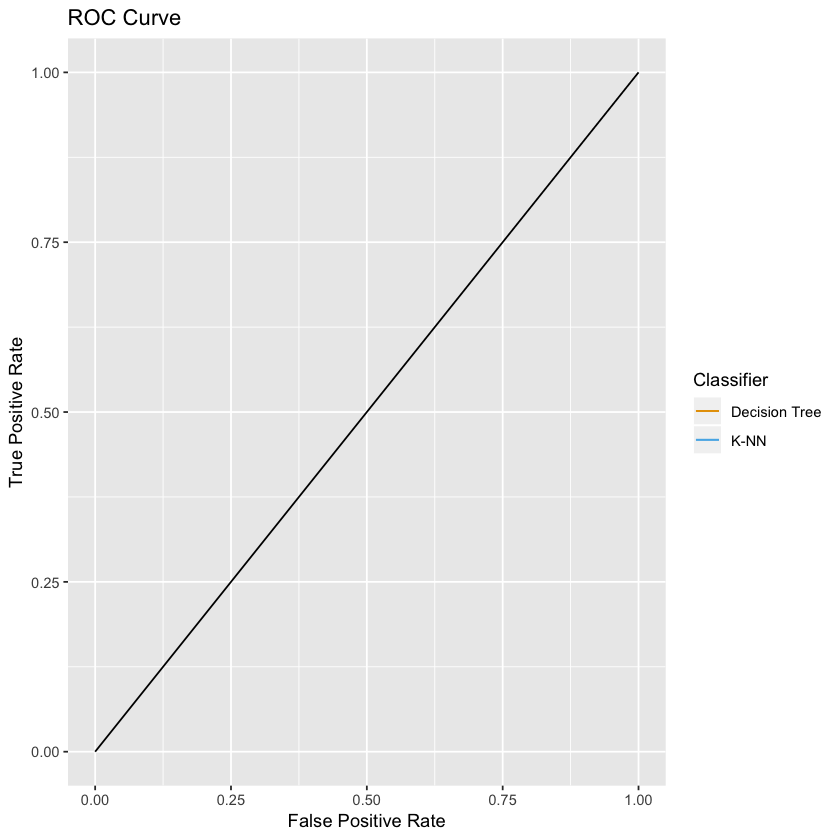

In [133]:
g <- ggplot() + 
  geom_line(data = dd1, aes(x = FP, y = TP, color = 'Decision Tree')) + 
  geom_line(data = dd2, aes(x = FP, y = TP, color = 'K-NN')) +
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1)) +
  ggtitle('ROC Curve') + 
  labs(x = 'False Positive Rate', y = 'True Positive Rate') 


g +  scale_colour_manual(name = 'Classifier', values = c('Decision Tree'='#E69F00', 
                                               'K-NN'='#56B4E9'))

# Tester le modele

In [61]:
valDf <- read.table("adult.test", 
                 sep = ',', 
                 fill = FALSE, 
                 strip.white = TRUE)

colnames(valDf) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
                 "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                 "hours_per_week", "native_country", "salary")

In [62]:
head(valDf)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [63]:
cat("Element manqué dans le dataset: ", sum(is.na(valDf)), "\n")
colSums(is.na(valDf)) ##TODO

Element manqué dans le dataset:  0 


age      workclass         fnlwgt      education  education_num 
             0              0              0              0              0 
marital_status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital_gain   capital_loss hours_per_week native_country         salary 
             0              0              0              0              0

In [64]:
valDf$workclass[ valDf$workclass == "?" ] <- NA
valDf$workclass = factor(valDf$workclass)

In [65]:
valDf$occupation[ valDf$occupation == "?" ] <- NA
valDf$occupation = factor(valDf$occupation)

In [66]:
valDf$native_country[ valDf$native_country == "?" ] <- NA
valDf$native_country = factor(valDf$native_country)

In [67]:
valDf$native_country[is.na(valDf$native_country)] <- names(which.max(table(valDf$native_country)))
valDf$workclass[is.na(valDf$workclass)] <- names(which.max(table(valDf$workclass)))
valDf$occupation[is.na(valDf$occupation)] <- names(which.max(table(valDf$occupation)))

In [68]:
valDf = subset(valDf, select = -c(relationship, education))

In [69]:
head(valDf)

age,workclass,fnlwgt,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
25,Private,226802,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K.
44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K.
18,Private,103497,10,Never-married,Prof-specialty,White,Female,0,0,30,United-States,<=50K.
34,Private,198693,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K.


In [70]:
X_validation <- df[test_index, -13]
y_validation <- df[test_index, "salary"]

In [71]:
dim(X_validation)

[1] 9769   12

In [72]:
encoder <- dummyVars(" ~ .", data=X_validation)
X_validation <- data.frame(predict(encoder, newdata = X_validation)) 

In [73]:
validate_test_set <- predictData(treeModel, X_test, y_test)
mc <- validate_test_set
infoDTVal <- statMC(mc)

Accuracy:  84,67602 
Sensitivity:  0,8711262 
Specificity:  0,7411251 
Recall:  0,9358506 
True Negative:  0,5701681 
False Positive:  0,4298319 
Arithmetic Mean:  0,7530093 
Geometric Mean:  0,7304739 
